In [175]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing Dataset

In [176]:
diamonds =  pd.read_csv('./data/diamonds.csv')
diamonds.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
36482,36483,0.32,Ideal,F,IF,60.9,57.0,943,4.42,4.45,2.70
53780,53781,0.80,Ideal,G,VS2,62.1,56.0,2728,5.94,6.00,3.71
34972,34973,0.23,Very Good,E,VVS1,61.8,59.0,472,3.89,3.91,2.41
47863,47864,0.59,Good,G,VS1,60.4,61.2,1910,5.38,5.43,3.26
19188,19189,1.01,Ideal,G,VVS2,62.5,56.0,7941,6.38,6.41,4.00
53259,53260,0.72,Good,F,SI1,63.4,58.0,2647,5.66,5.69,3.60
14469,14470,1.02,Ideal,E,SI1,62.2,54.7,5840,6.44,6.47,4.01
19535,19536,1.02,Ideal,G,VVS1,61.5,57.0,8168,6.44,6.47,3.97
46309,46310,0.30,Premium,E,SI1,59.8,60.0,526,4.31,4.35,2.59
23655,23656,1.57,Ideal,G,SI1,61.8,55.0,11702,7.49,7.43,4.61


## Data Preprocessing

### Checking for null values

In [177]:
null_values = diamonds.isnull().sum()

print("Null values in the dataset:")
print(null_values)


Null values in the dataset:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


### Dropping column one

In [4]:
diamonds.drop(diamonds.columns[0], axis=1, inplace=True)
diamonds.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
764,0.71,Very Good,E,VS2,63.5,59.0,2858,5.68,5.59,3.58
49775,0.70,Premium,F,SI1,61.3,59.0,2161,5.71,5.74,3.51
41846,0.54,Very Good,F,SI1,63.0,57.0,1255,5.18,5.23,3.28
52962,0.24,Very Good,E,VVS1,62.7,59.0,552,3.97,4.00,2.50
36172,0.32,Ideal,F,IF,61.6,56.0,929,4.43,4.47,2.74
24863,2.50,Fair,H,SI2,64.9,58.0,13278,8.46,8.43,5.48
14264,1.01,Ideal,H,VS1,62.6,57.0,5777,6.37,6.40,4.00
27867,0.38,Ideal,E,SI1,61.4,57.0,653,4.64,4.67,2.86
31308,0.32,Ideal,D,VS2,61.0,57.0,758,4.42,4.46,2.71
51769,0.70,Good,F,SI1,58.7,60.0,2409,5.75,5.81,3.39


### Grouping columns as: 
1. categorical columns 
2. numerical columns 
3. bool columns 

In [5]:
categorical_columns = diamonds.select_dtypes(include=['object']).columns.tolist()
numerical_columns = diamonds.select_dtypes(include=['int', 'float']).columns.tolist()
bool_columns = diamonds.select_dtypes(include=['bool']).columns.tolist()

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)
print("Boolean columns:", bool_columns)

Categorical columns: ['cut', 'color', 'clarity']
Numerical columns: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
Boolean columns: []


### getting general info on the dataset

In [6]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [8]:
#Dropping dimentionless diamonds
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)
diamonds.shape

(53920, 10)

### Pairplots of data

/home/atanki/miniconda3/envs/cuml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/atanki/miniconda3/envs/cuml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/atanki/miniconda3/envs/cuml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/atanki/miniconda3/envs/cuml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

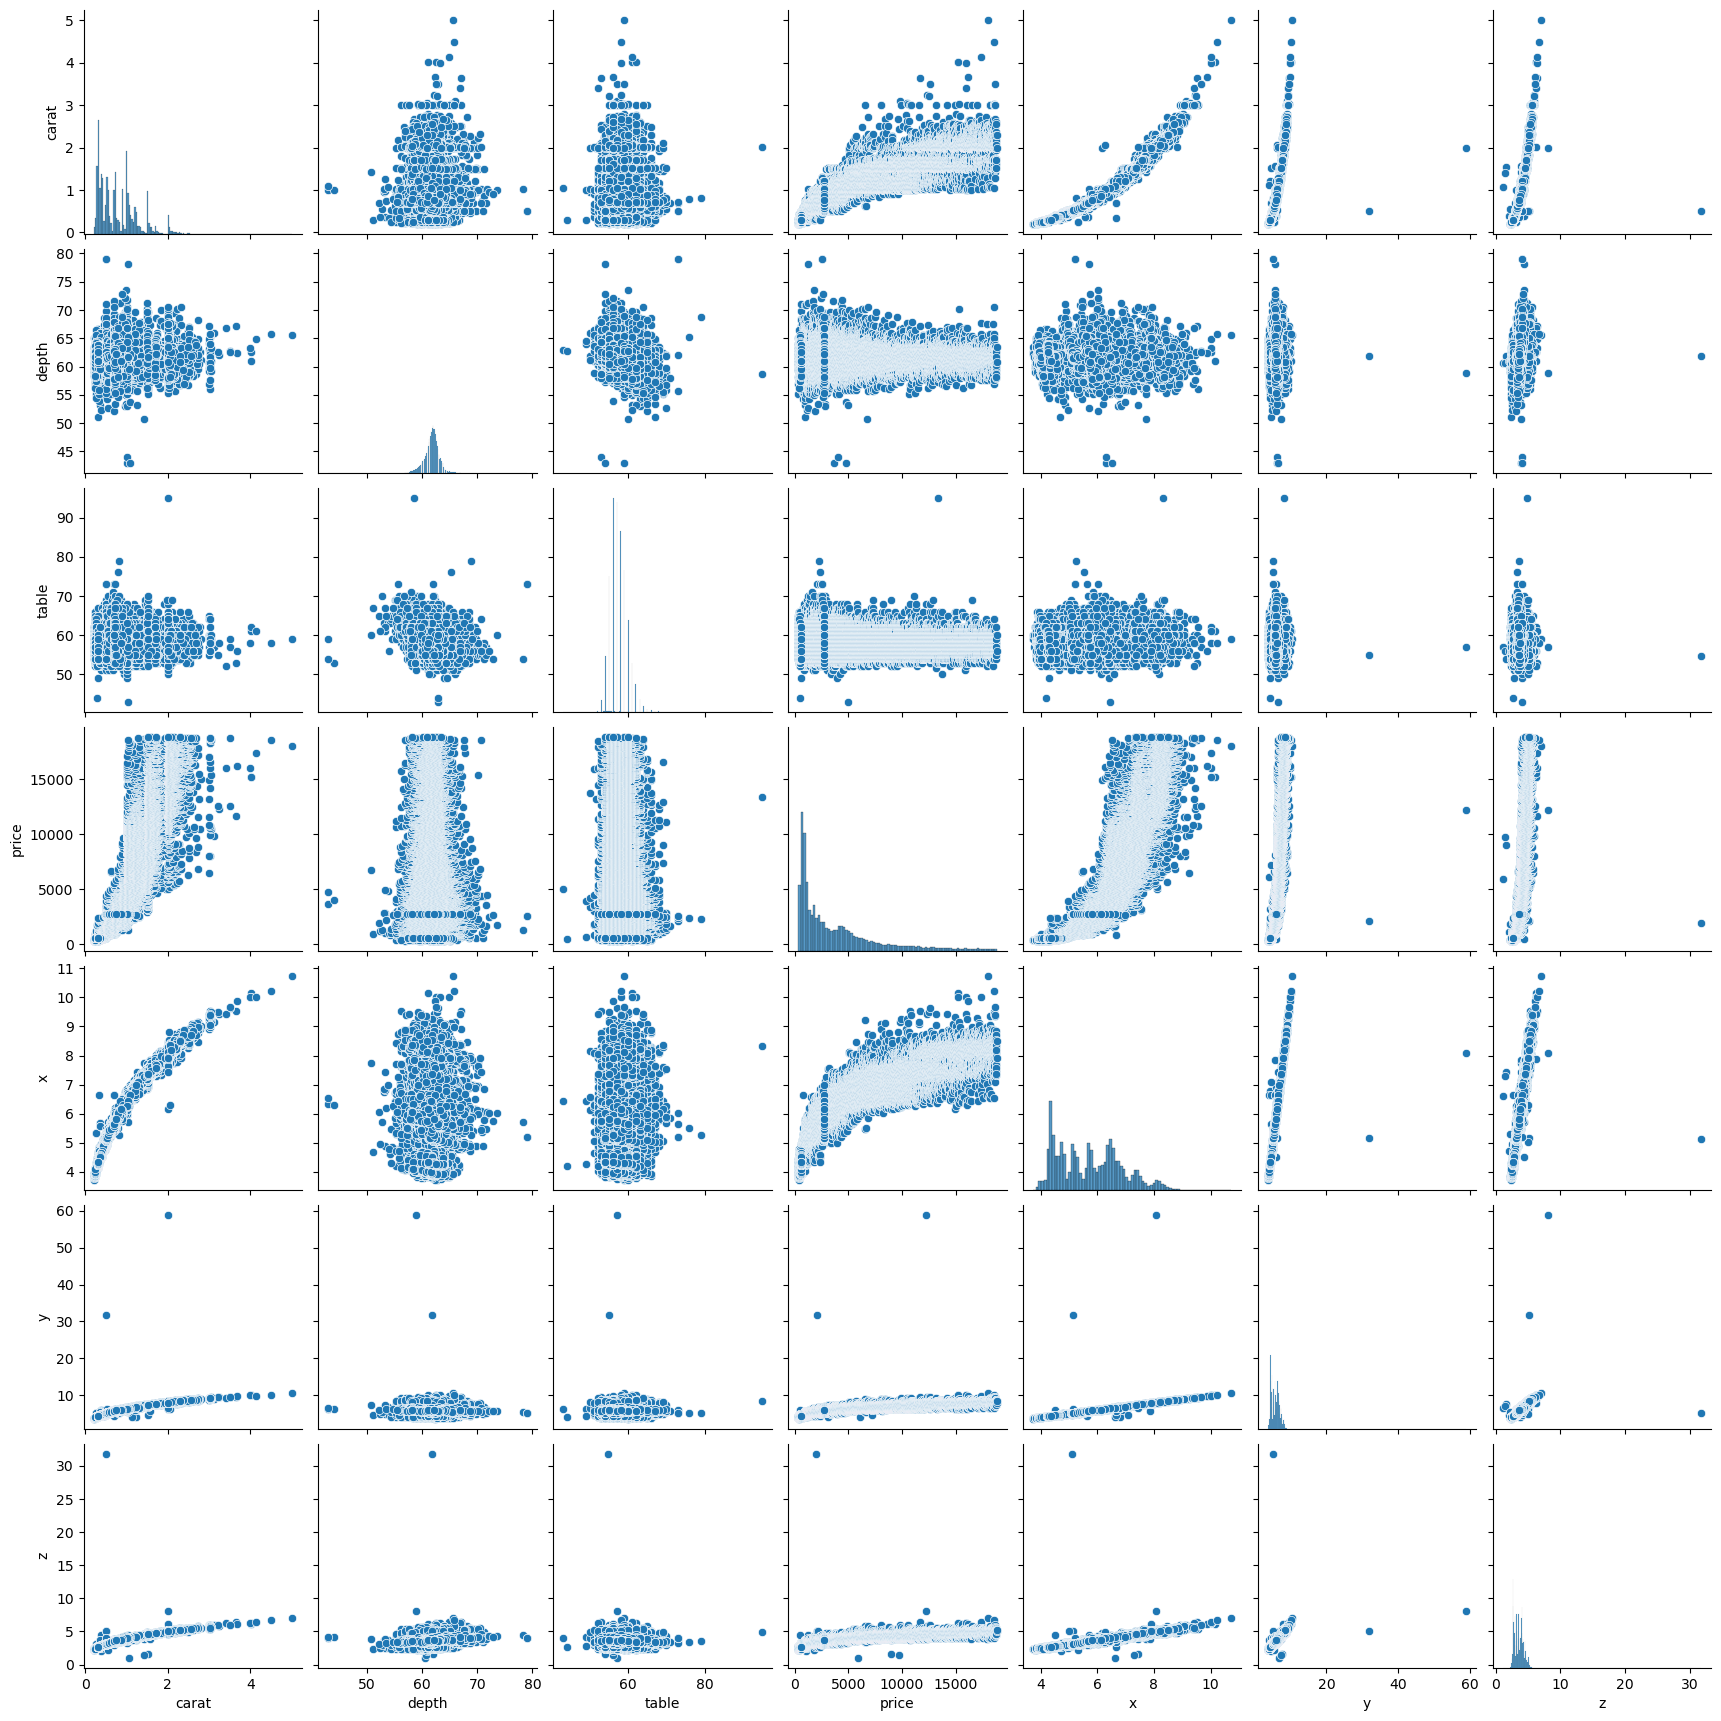

In [9]:
sns.pairplot(diamonds)

### A few points to notice in these pair plots

There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.

`y` and `z` have some dimensional outlies in our dataset that needs to be eliminated.
The `depth` should be capped but we must examine the regression line to be sure.
The `table` featured should be capped too.
Let's have a look at regression plots to get a close look at the outliers.

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

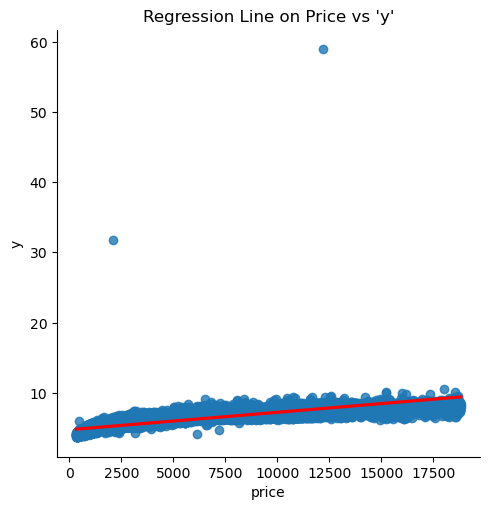

In [10]:
sns.lmplot(x='price', y='y', data=diamonds, line_kws={"color": "red"})
plt.title("Regression Line on Price vs 'y'")

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

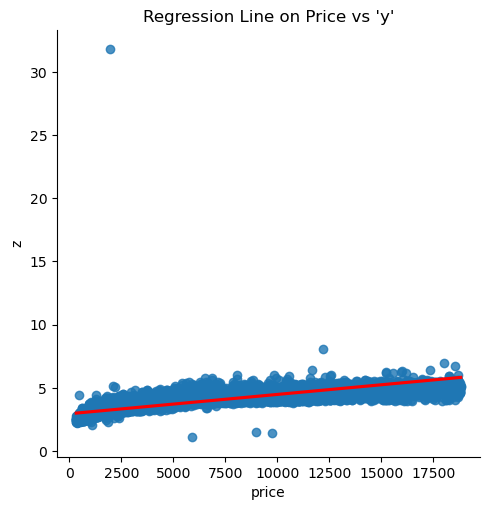

In [11]:
sns.lmplot(x='price', y='z', data=diamonds , line_kws={"color": "red"})
plt.title("Regression Line on Price vs 'y'")


Text(0.5, 1.0, "Regression Line on Price vs 'y'")

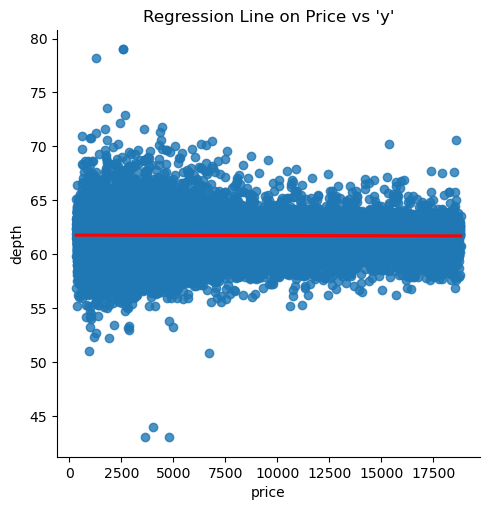

In [12]:
sns.lmplot(x='price', y='depth', data=diamonds, line_kws={"color": "red"})
plt.title("Regression Line on Price vs 'y'")

Text(0.5, 1.0, "Regression Line on Price vs 'table'")

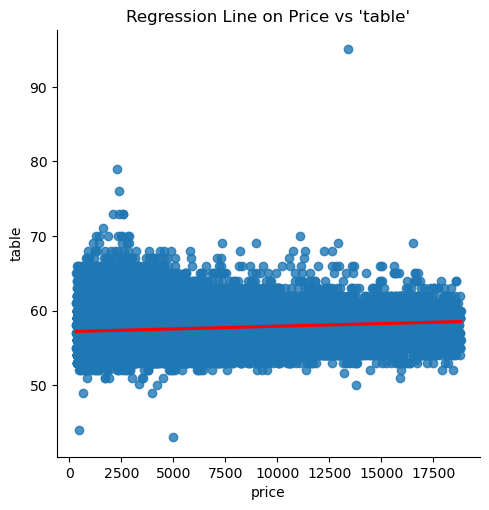

In [13]:
sns.lmplot(x='price', y='table', data=diamonds, line_kws={"color": "red"})
plt.title("Regression Line on Price vs 'table'")

## Dropping the Outliers

In [14]:
# Dropping the outliers from the diamonds dataset
diamonds = diamonds[(diamonds["depth"] < 75) & (diamonds["depth"] > 45)]
diamonds = diamonds[(diamonds["table"] < 80) & (diamonds["table"] > 40)]
diamonds = diamonds[(diamonds["x"] < 30)]
diamonds = diamonds[(diamonds["y"] < 30)]
diamonds = diamonds[(diamonds["z"] < 30) & (diamonds["z"] > 2)]

# Check the shape of the dataset after dropping outliers
diamonds.shape

(53907, 10)

/home/atanki/miniconda3/envs/cuml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/atanki/miniconda3/envs/cuml/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/atanki/miniconda3/envs/cuml/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/atanki/miniconda3/envs/cuml/lib/python3.11

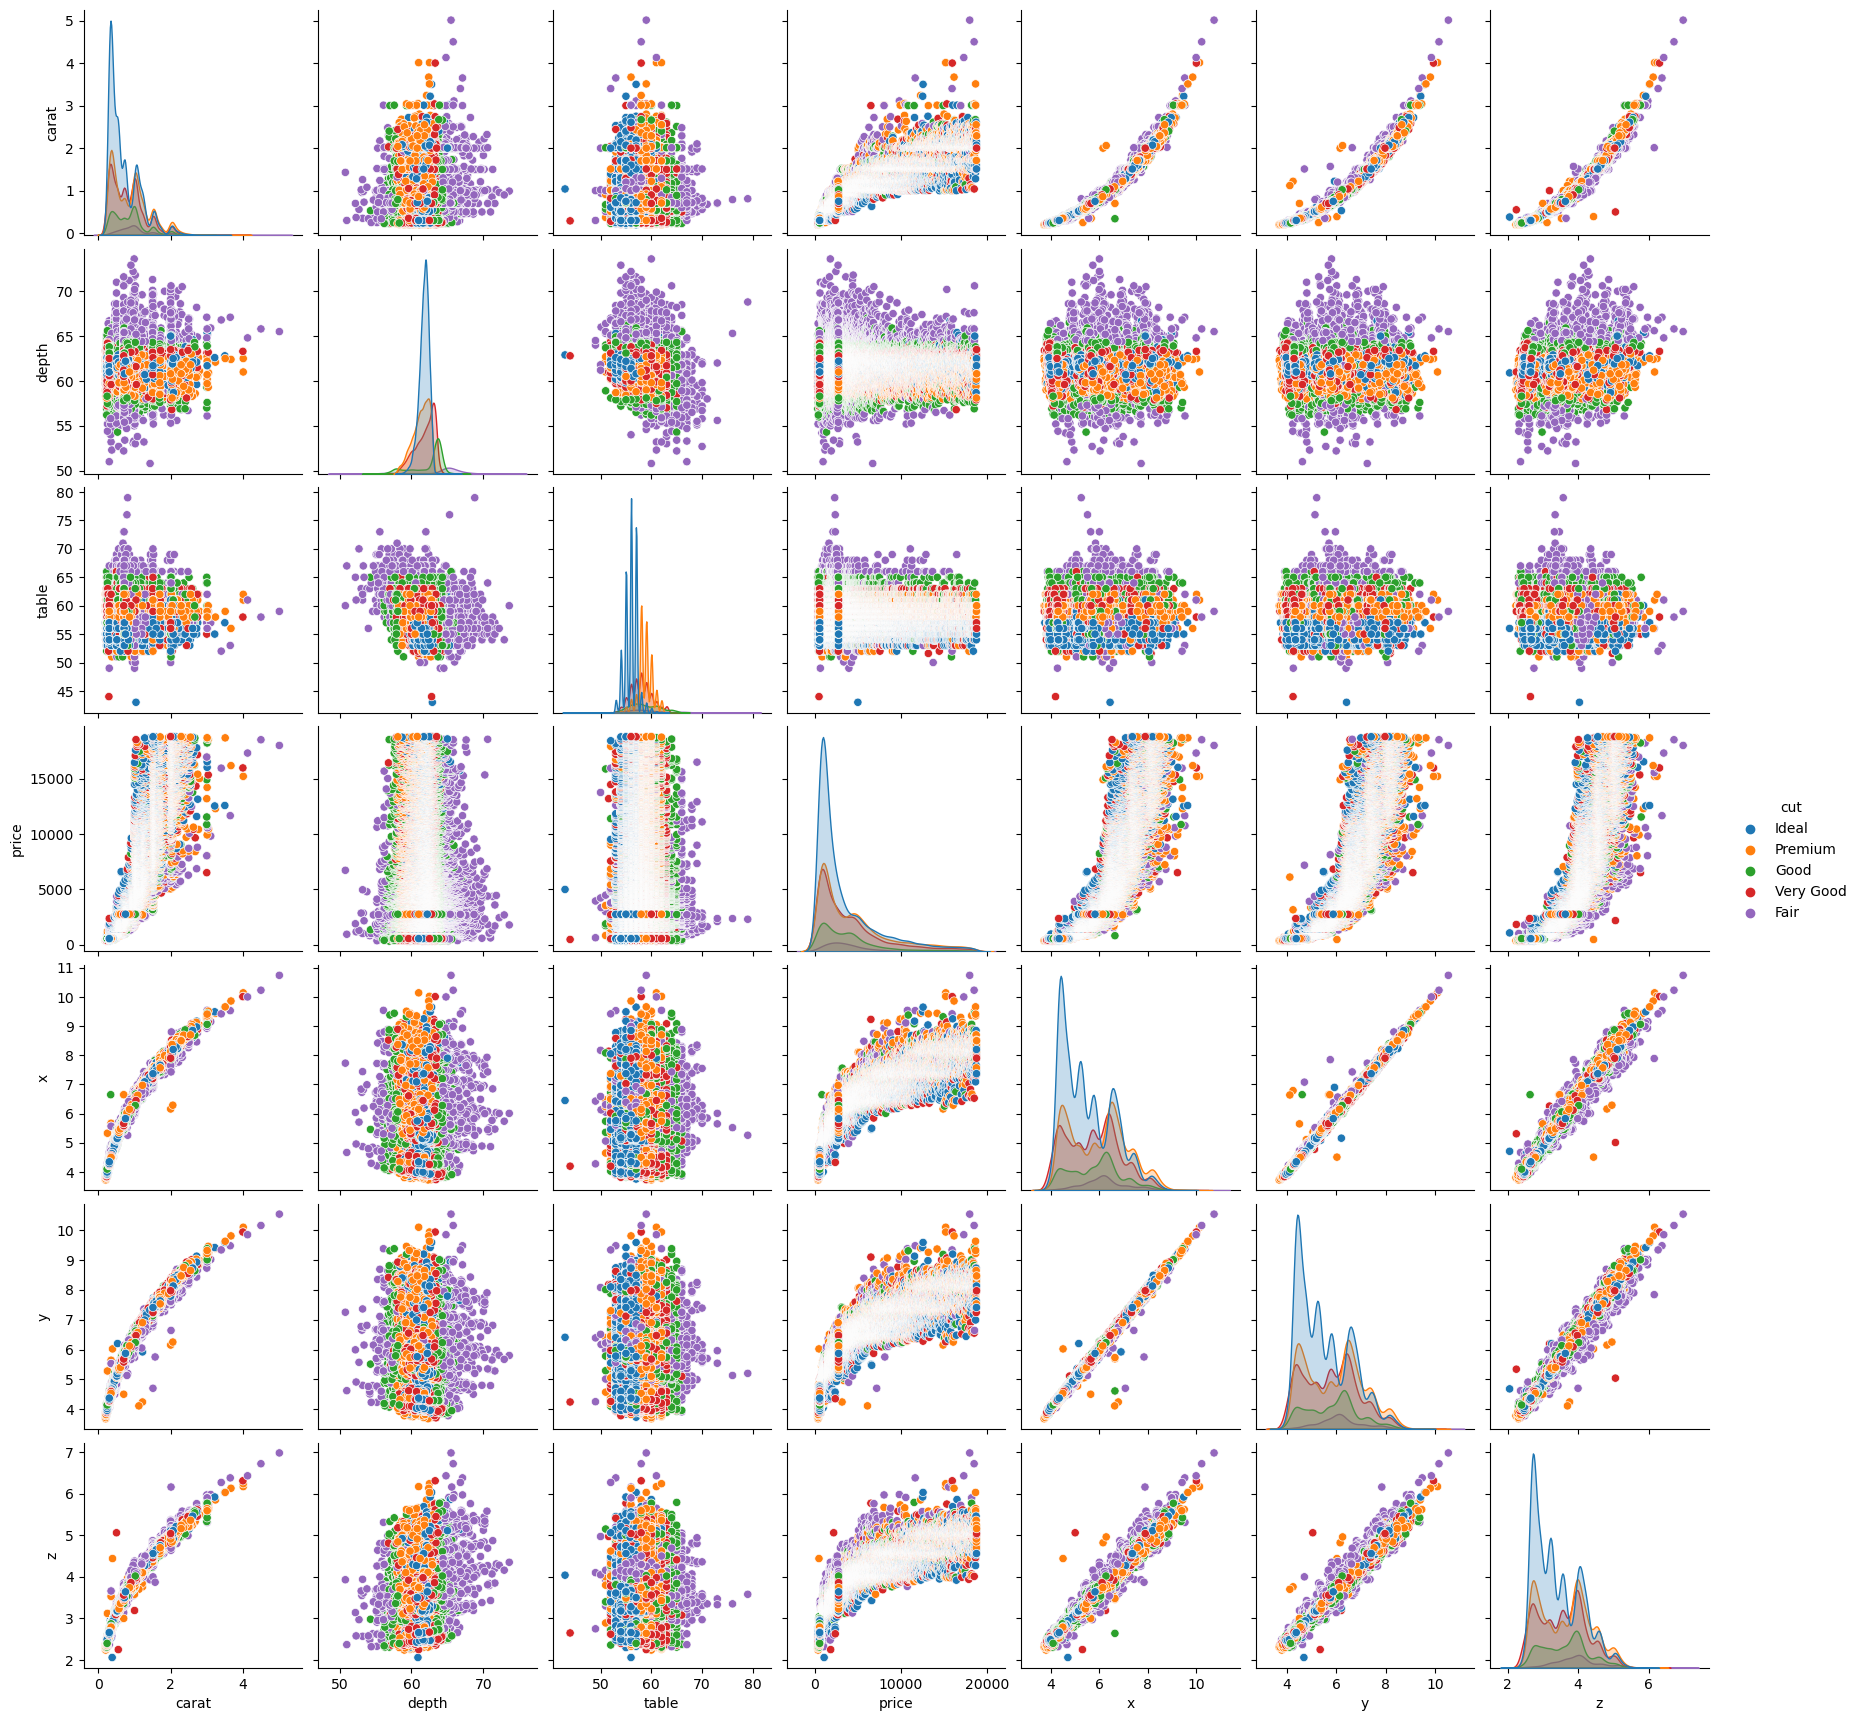

In [15]:
ax=sns.pairplot(diamonds, hue= "cut")

#### Violin Plots

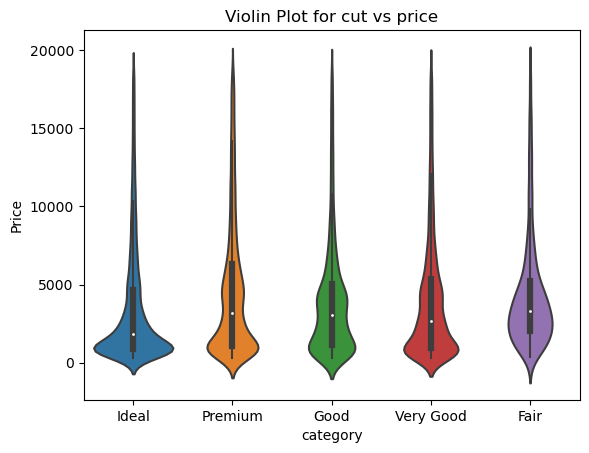

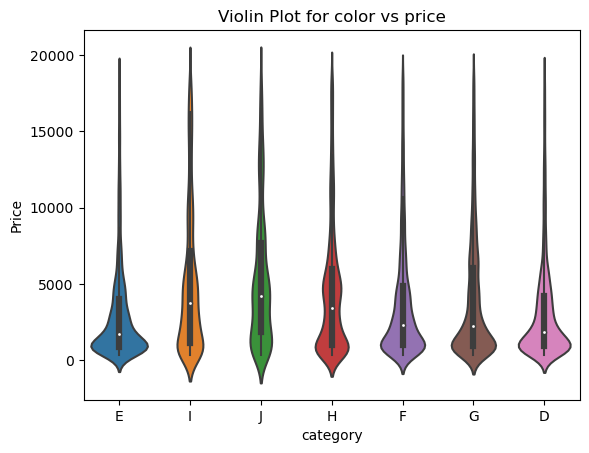

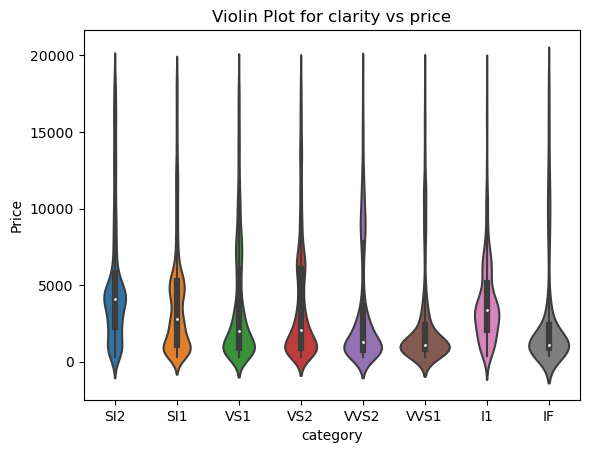

In [16]:
# Create a violin plot for the categorical features
for category in categorical_columns:
    sns.violinplot(x=category, y='price' ,data=diamonds)
    plt.title(f"Violin Plot for {category} vs price")
    plt.xlabel(f"category")
    plt.ylabel("Price")
    plt.show()

### Moving Price column to the end

In [17]:
price_column = diamonds['price']
diamonds = diamonds.drop(columns=['price']) 
diamonds['price'] = price_column

diamonds.sample(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
33186,0.37,Good,E,VS1,63.3,56.0,4.58,4.61,2.91,818
5777,1.11,Very Good,J,SI1,62.0,58.0,6.57,6.62,4.09,3901
28505,0.30,Ideal,G,VS1,61.1,56.0,4.36,4.35,2.66,673
4223,0.90,Good,E,SI1,63.5,55.0,6.12,6.22,3.92,3570
33260,0.42,Premium,D,VS2,61.3,58.0,4.80,4.83,2.95,825
26885,2.42,Ideal,H,SI2,62.3,57.0,8.62,8.55,5.35,16826
30367,0.36,Ideal,I,VS1,62.1,57.0,4.58,4.54,2.83,729
9817,1.03,Good,D,SI2,59.3,58.0,6.57,6.61,3.91,4671
5717,0.25,Very Good,E,VVS2,59.8,59.0,4.07,4.09,2.44,575
31859,0.30,Premium,H,VVS2,60.6,58.0,4.35,4.33,2.63,776


In [18]:
diamonds.shape

(53907, 10)

### Label Encoding categorical columns 

In [19]:
# Dictionary to store unique values for each categorical column
unique_values_dict = {}

for column in diamonds.columns.tolist():
    unique_values_dict[column] = diamonds[column].unique()

# Print unique values for each categorical column
for column, unique_values in unique_values_dict.items():
    print(f"Unique values for column '{column}':")
    # print(unique_values)
    print(len(unique_values))


Unique values for column 'carat':
273
Unique values for column 'cut':
5
Unique values for column 'color':
7
Unique values for column 'clarity':
8
Unique values for column 'depth':
180
Unique values for column 'table':
126
Unique values for column 'x':
553
Unique values for column 'y':
548
Unique values for column 'z':
369
Unique values for column 'price':
11595


In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

diamonds['cut'] = label_encoder.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder.fit_transform(diamonds['clarity'])
diamonds['depth'] = label_encoder.fit_transform(diamonds['depth'])
diamonds['x'] = label_encoder.fit_transform(diamonds['x'])
diamonds['y'] = label_encoder.fit_transform(diamonds['y'])
diamonds['z'] = label_encoder.fit_transform(diamonds['z'])
diamonds['carat'] = label_encoder.fit_transform(diamonds['carat'])
diamonds['table'] = label_encoder.fit_transform(diamonds['table'])

diamonds.sample(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
7950,45,2,0,6,85,40,177,183,120,4320
47752,34,3,0,5,75,60,151,158,99,1892
41615,9,4,2,4,57,80,57,63,34,504
26882,228,3,5,5,67,60,507,502,306,16820
11687,83,2,4,2,86,50,277,274,180,5063
2883,64,2,3,2,90,50,230,230,154,3279
46435,34,1,1,5,68,90,151,159,96,1771
6557,79,3,2,3,72,90,269,265,166,4075
46323,49,4,4,2,91,56,190,199,132,1757
44782,39,4,3,5,94,70,152,160,110,1623


In [21]:
diamonds.iloc[10]

carat       10
cut          1
color        6
clarity      2
depth      106
table       30
x           49
y           55
z           50
price      339
Name: 10, dtype: int64

In [22]:
diamonds.shape

(53907, 10)

#### Scaling Features

In [23]:
price_column = diamonds['price']

In [24]:
X = diamonds.drop(columns='price') 
y = diamonds['price'] 

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

pd.DataFrame(X).sample(10)

,0,1,2,3,4,5,6,7,8
4815,0.238938,1.407996,1.414224,-1.064372,0.741247,-0.202985,0.320794,0.402544,0.449668
28965,-0.969094,0.434696,-0.349164,0.675206,-1.799998,1.191597,-1.047133,-1.020412,-1.200281
43715,-0.608804,-1.511904,0.826428,0.095347,1.376558,-1.132706,-0.591157,-0.570109,-0.433200
48519,-0.396868,1.407996,-0.349164,0.675206,0.035345,-0.667846,-0.278233,-0.245892,-0.259521
52949,-0.163739,1.407996,0.826428,0.095347,-1.164687,-0.202985,0.052573,0.105344,-0.056896
42222,-0.481642,-0.538604,0.826428,-1.064372,-1.729408,1.191597,-0.260351,-0.227879,-0.433200
12377,-0.990287,-0.538604,0.826428,0.095347,0.105936,-1.132706,-1.136540,-1.119479,-1.113441
30717,-0.778352,-0.538604,-0.349164,-1.064372,-0.317605,-0.667846,-0.778912,-0.750231,-0.795030
32890,-0.990287,-0.538604,0.238632,1.255066,0.388296,-1.132706,-1.172303,-1.164509,-1.127915
5653,0.429679,0.434696,-0.349164,-1.064372,-1.658818,2.121319,0.732066,0.708750,0.493087


In [26]:
X[10]

array([-1.05386781, -1.51190397,  2.00201955, -1.06437164,  1.58832878,
       -1.13270647, -1.32429472, -1.30860573, -1.1713344 ])

In [27]:
X.shape

(53907, 9)

In [28]:
y.shape

(53907,)

In [29]:
null_values = diamonds.isnull().sum()

print("Null values in the dataset:")
print(null_values)


Null values in the dataset:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


In [30]:
diamonds.dropna()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,3,2,1,3,81,30,19,25,20,326
1,1,3,1,2,64,90,13,11,8,326
2,3,1,1,4,35,115,29,34,8,327
3,9,3,5,5,90,60,44,50,40,334
4,11,1,6,3,99,60,58,62,52,335
...,...,...,...,...,...,...,...,...,...,...
53935,52,2,0,2,74,50,199,203,127,2757
53936,52,1,0,2,97,30,193,202,138,2757
53937,50,4,0,2,94,80,190,195,133,2757
53938,66,3,4,3,76,60,239,239,151,2757


### correlation matrix

<Axes: >

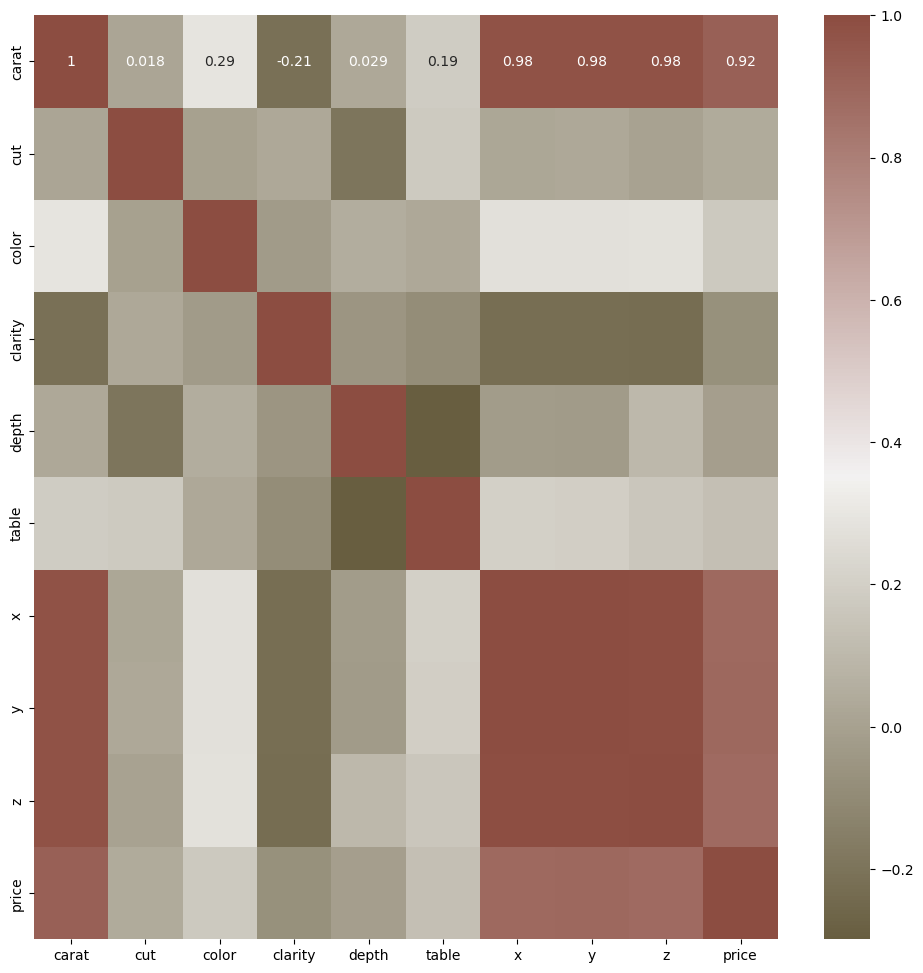

In [31]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= diamonds.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

### Dividing the dataframe into training and test sets

In [32]:
diamonds.shape

(53907, 10)

In [33]:
X

array([[-1.20222253, -0.53860383, -0.93696033, ..., -1.59251573,
        -1.57878728, -1.60553137],
       [-1.24460959,  0.43469632, -0.93696033, ..., -1.64615993,
        -1.70487201, -1.77921016],
       [-1.20222253, -1.51190397, -0.93696033, ..., -1.50310872,
        -1.49773282, -1.77921016],
       ...,
       [-0.20612653,  1.40799646, -1.5247563 , ..., -0.06365599,
        -0.04775846,  0.02994389],
       [ 0.13296998,  0.43469632,  0.8264276 , ...,  0.37443832,
         0.34850783,  0.29046207],
       [-0.10015887, -0.53860383, -1.5247563 , ...,  0.08833592,
         0.12335653,  0.14572975]])

In [34]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53907, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Eploratory Analysis

### Experimenting with the models

- Linear Regression
- Logistic Regression
- Polynomial Regression (degree 2 and 3)
- Decision Trees
- Random Forests
- Support Vector Machines (SVM)
- K-Nearest Neighbors (KNN)
- XGBoost Regressor

In [36]:
from sklearn.metrics import mean_squared_error

mse = []
cv_results_rms = []

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

pipeline_lr = Pipeline([("lr", LinearRegression())])

pipeline_pr2 = Pipeline([("pf2", PolynomialFeatures(degree=2)),
    ("linear_reg", LinearRegression())])

pipeline_pr3 = Pipeline([("pf2", PolynomialFeatures(degree=3)),
    ("linear_reg", LinearRegression())])

pipeline_dt = Pipeline([("dt", DecisionTreeRegressor(random_state=0))])

pipeline_rf = Pipeline([("rf", RandomForestRegressor(n_estimators = 10, random_state =0))])

pipeline_knn = Pipeline([("knn", KNeighborsRegressor(n_neighbors = 5, metric ='minkowski', algorithm='auto'))])

pipeline_svr = Pipeline([("svr", SVR(kernel='rbf'))])

pipeline_xgb = Pipeline([("xgb", XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=100))])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_pr2, pipeline_pr3, pipeline_dt, pipeline_rf, pipeline_knn, pipeline_svr, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {
    0: "LinearRegression",
    1: "PolynomialRegression(degree=2)",
    2: "PolynomialRegression(degree=3)",
    3: "DecisionTree",
    4: "RandomForest",
    5: "KNeighbors",
    6: "SVR",
    7: "XGBRegressor"
}

In [38]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [39]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1314.174981 
PolynomialRegression(degree=2): -1034.572492 
PolynomialRegression(degree=3): -1699.023271 
DecisionTree: -755.091501 
RandomForest: -575.592292 
KNeighbors: -815.075426 
SVR: -2859.400079 
XGBRegressor: -546.513724 


In [40]:
for i, model in enumerate(pipelines):
    y_pred = model.predict(X_test)
    model_mse = mean_squared_error(y_test, y_pred)
    mse.append(model_mse)
    print(f"{pipe_dict[i]} : {model_mse}")

LinearRegression : 1695537.0312458528
PolynomialRegression(degree=2) : 1030232.5732223622
PolynomialRegression(degree=3) : 1262716.963333067
DecisionTree : 555632.5986134298
RandomForest : 333954.22451973264
KNeighbors : 659380.0082915971
SVR : 7228952.149741222
XGBRegressor : 296828.03932756215


***XGB Regressor*** has the best MSE and CV score.

#### Ensembling the XGB Regressor model.

In [64]:
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBRegressor

# Define XGBRegressor pipeline
pipeline_xgb = Pipeline([("xgb", XGBRegressor())])

# Define hyperparameters grid for XGBRegressor
param_grid_xgb = {
    "xgb__n_estimators": [50, 100, 150, 200, 250, 300, 350],
    "xgb__learning_rate": [0.01, 0.1, 0.3, 0.5],
    "xgb__max_depth": [3, 5, 7, 9, 11]
}

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize progress variables
total_combinations = len(param_grid_xgb['xgb__n_estimators']) * len(param_grid_xgb['xgb__learning_rate']) * len(param_grid_xgb['xgb__max_depth'])
current_combination = 0

best_score = float("-inf")
best_params = None

# Perform hyperparameter tuning using GridSearchCV
for n_estimators in param_grid_xgb['xgb__n_estimators']:
    for learning_rate in param_grid_xgb['xgb__learning_rate']:
        for max_depth in param_grid_xgb['xgb__max_depth']:
            current_combination += 1
            print(f"Tuning combination {current_combination} of {total_combinations}")
            
            # Update XGBRegressor parameters
            pipeline_xgb.set_params(xgb__n_estimators=n_estimators, xgb__learning_rate=learning_rate, xgb__max_depth=max_depth)
            
            # Fit model
            pipeline_xgb.fit(X_train, y_train)
            
            # Compute score
            score = pipeline_xgb.score(X_test, y_test)
            
            # Check if this combination is better than the previous best
            if score > best_score:
                best_score = score
                best_params = {
                    "xgb__n_estimators": n_estimators,
                    "xgb__learning_rate": learning_rate,
                    "xgb__max_depth": max_depth
                }

# Print best hyperparameters and score found
print("Best hyperparameters found for XGBRegressor:")
print(best_params)
print("Best score found:", best_score)

# Update pipeline with best hyperparameters
pipeline_xgb.set_params(**best_params)

# Fit final model with best hyperparameters
pipeline_xgb.fit(X_train, y_train)

# Access the best XGBRegressor model
best_xgb_model = pipeline_xgb


Tuning combination 1 of 140
Tuning combination 2 of 140
Tuning combination 3 of 140
Tuning combination 4 of 140
Tuning combination 5 of 140
Tuning combination 6 of 140
Tuning combination 7 of 140
Tuning combination 8 of 140
Tuning combination 9 of 140
Tuning combination 10 of 140
Tuning combination 11 of 140
Tuning combination 12 of 140
Tuning combination 13 of 140
Tuning combination 14 of 140
Tuning combination 15 of 140
Tuning combination 16 of 140
Tuning combination 17 of 140
Tuning combination 18 of 140
Tuning combination 19 of 140
Tuning combination 20 of 140
Tuning combination 21 of 140
Tuning combination 22 of 140
Tuning combination 23 of 140
Tuning combination 24 of 140
Tuning combination 25 of 140
Tuning combination 26 of 140
Tuning combination 27 of 140
Tuning combination 28 of 140
Tuning combination 29 of 140
Tuning combination 30 of 140
Tuning combination 31 of 140
Tuning combination 32 of 140
Tuning combination 33 of 140
Tuning combination 34 of 140
Tuning combination 35 o

In [65]:
cv_score = cross_val_score(best_xgb_model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
print("%f " % (cv_score.mean()))

-534.783981 


In [67]:
y_pred1 = best_xgb_model.predict(X_train)

In [73]:
y_pred1 = pd.DataFrame(scaler.fit_transform(pd.DataFrame(y_pred1)))

In [74]:
y_pred1

,0
0,-0.899992
1,-0.893742
2,-0.892992
3,-0.884020
4,-0.912179
...,...
53902,-0.253110
53903,-0.289372
53904,-0.331858
53905,-0.310249


In [91]:
X = pd.DataFrame(X)
X['y_pred'] = y_pred1
X

In [79]:
X = X.values
y = y.values

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

pipeline_lr = Pipeline([("lr", LinearRegression())])

pipeline_pr2 = Pipeline([("pf2", PolynomialFeatures(degree=2)),
    ("linear_reg", LinearRegression())])

pipeline_pr3 = Pipeline([("pf2", PolynomialFeatures(degree=3)),
    ("linear_reg", LinearRegression())])

pipeline_dt = Pipeline([("dt", DecisionTreeRegressor(random_state=0))])

pipeline_rf = Pipeline([("rf", RandomForestRegressor(n_estimators = 10, random_state =0))])

pipeline_knn = Pipeline([("knn", KNeighborsRegressor(n_neighbors = 5, metric ='minkowski', algorithm='auto'))])

pipeline_svr = Pipeline([("svr", SVR(kernel='rbf'))])

pipeline_xgb = Pipeline([("xgb", XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=100))])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_pr2, pipeline_pr3, pipeline_dt, pipeline_rf, pipeline_knn, pipeline_svr, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {
    0: "LinearRegression",
    1: "PolynomialRegression(degree=2)",
    2: "PolynomialRegression(degree=3)",
    3: "DecisionTree",
    4: "RandomForest",
    5: "KNeighbors",
    6: "SVR",
    7: "XGBRegressor"
}

In [83]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -394.441963 
PolynomialRegression(degree=2): -392.794279 
PolynomialRegression(degree=3): -733.265997 
DecisionTree: -554.986878 
RandomForest: -419.507070 
KNeighbors: -567.574455 


In [90]:
poly_reg_deg2 = Pipeline([("pf2", PolynomialFeatures(degree=2)), ("linear_reg", LinearRegression())])
poly_reg_deg2.fit(X_train, y_train)
y_pred2 = poly_reg_deg2.predict(X)
y_pred2 = pd.DataFrame(scaler.fit_transform(pd.DataFrame(y_pred2)))
y_pred2

,0
0,-0.890951
1,-0.859023
2,-0.910370
3,-0.882950
4,-0.911495
...,...
53902,-0.240756
53903,-0.273820
53904,-0.333061
53905,-0.306122


In [104]:
X = pd.DataFrame(X)
X['y_pred2'] = y_pred2
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,y_pred2
0,-1.202223,-0.538604,-0.936960,-0.484512,-0.176425,-1.132706,-1.592516,-1.578787,-1.605531,-0.899992,-0.899992,-0.890951,-0.890951,-0.890951,-0.890951
1,-1.244610,0.434696,-0.936960,-1.064372,-1.376457,1.656458,-1.646160,-1.704872,-1.779210,-0.893742,-0.893742,-0.859023,-0.859023,-0.859023,-0.859023
2,-1.202223,-1.511904,-0.936960,0.095347,-3.423572,2.818610,-1.503109,-1.497733,-1.779210,-0.892992,-0.892992,-0.910370,-0.910370,-0.910370,-0.910370
3,-1.075061,0.434696,1.414224,0.675206,0.458886,0.261876,-1.368998,-1.353636,-1.316067,-0.884020,-0.884020,-0.882950,-0.882950,-0.882950,-0.882950
4,-1.032674,-1.511904,2.002020,-0.484512,1.094198,0.261876,-1.243828,-1.245563,-1.142388,-0.912179,-0.912179,-0.911495,-0.911495,-0.911495,-0.911495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53902,-0.163739,-0.538604,-1.524756,-1.064372,-0.670556,-0.202985,0.016810,0.024290,-0.056896,-0.253110,-0.253110,-0.240756,-0.240756,-0.240756,-0.240756
53903,-0.163739,-1.511904,-1.524756,-1.064372,0.953017,-1.132706,-0.036834,0.015284,0.102310,-0.289372,-0.289372,-0.273820,-0.273820,-0.273820,-0.273820
53904,-0.206127,1.407996,-1.524756,-1.064372,0.741247,1.191597,-0.063656,-0.047758,0.029944,-0.331858,-0.331858,-0.333061,-0.333061,-0.333061,-0.333061
53905,0.132970,0.434696,0.826428,-0.484512,-0.529376,0.261876,0.374438,0.348508,0.290462,-0.310249,-0.310249,-0.306122,-0.306122,-0.306122,-0.306122


In [108]:
X = X.values

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.202223,-0.538604,-0.936960,-0.484512,-0.176425,-1.132706,-1.592516,-1.578787,-1.605531,-0.899992,-0.890951
1,-1.244610,0.434696,-0.936960,-1.064372,-1.376457,1.656458,-1.646160,-1.704872,-1.779210,-0.893742,-0.859023
2,-1.202223,-1.511904,-0.936960,0.095347,-3.423572,2.818610,-1.503109,-1.497733,-1.779210,-0.892992,-0.910370
3,-1.075061,0.434696,1.414224,0.675206,0.458886,0.261876,-1.368998,-1.353636,-1.316067,-0.884020,-0.882950
4,-1.032674,-1.511904,2.002020,-0.484512,1.094198,0.261876,-1.243828,-1.245563,-1.142388,-0.912179,-0.911495
...,...,...,...,...,...,...,...,...,...,...,...
53902,-0.163739,-0.538604,-1.524756,-1.064372,-0.670556,-0.202985,0.016810,0.024290,-0.056896,-0.253110,-0.240756
53903,-0.163739,-1.511904,-1.524756,-1.064372,0.953017,-1.132706,-0.036834,0.015284,0.102310,-0.289372,-0.273820
53904,-0.206127,1.407996,-1.524756,-1.064372,0.741247,1.191597,-0.063656,-0.047758,0.029944,-0.331858,-0.333061
53905,0.132970,0.434696,0.826428,-0.484512,-0.529376,0.261876,0.374438,0.348508,0.290462,-0.310249,-0.306122


In [112]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

pipeline_lr = Pipeline([("lr", LinearRegression())])

pipeline_pr2 = Pipeline([("pf2", PolynomialFeatures(degree=2)),
    ("linear_reg", LinearRegression())])

pipeline_pr3 = Pipeline([("pf2", PolynomialFeatures(degree=3)),
    ("linear_reg", LinearRegression())])

pipeline_dt = Pipeline([("dt", DecisionTreeRegressor(random_state=0))])

pipeline_rf = Pipeline([("rf", RandomForestRegressor(n_estimators = 10, random_state =0))])

pipeline_knn = Pipeline([("knn", KNeighborsRegressor(n_neighbors = 5, metric ='minkowski', algorithm='auto'))])

pipeline_svr = Pipeline([("svr", SVR(kernel='rbf'))])

pipeline_xgb = Pipeline([("xgb", XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=100))])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_pr2, pipeline_pr3, pipeline_dt, pipeline_rf, pipeline_knn, pipeline_svr, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {
    0: "LinearRegression",
    1: "PolynomialRegression(degree=2)",
    2: "PolynomialRegression(degree=3)",
    3: "DecisionTree",
    4: "RandomForest",
    5: "KNeighbors",
    6: "SVR",
    7: "XGBRegressor"
}

In [113]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [114]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -390.334202 
PolynomialRegression(degree=2): -391.030275 
PolynomialRegression(degree=3): -1249.699726 
DecisionTree: -553.919491 
RandomForest: -416.979052 
KNeighbors: -524.934934 
SVR: -2689.551709 
XGBRegressor: -404.716302 


In [116]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.202223,-0.538604,-0.936960,-0.484512,-0.176425,-1.132706,-1.592516,-1.578787,-1.605531,-0.899992,-0.890951
1,-1.244610,0.434696,-0.936960,-1.064372,-1.376457,1.656458,-1.646160,-1.704872,-1.779210,-0.893742,-0.859023
2,-1.202223,-1.511904,-0.936960,0.095347,-3.423572,2.818610,-1.503109,-1.497733,-1.779210,-0.892992,-0.910370
3,-1.075061,0.434696,1.414224,0.675206,0.458886,0.261876,-1.368998,-1.353636,-1.316067,-0.884020,-0.882950
4,-1.032674,-1.511904,2.002020,-0.484512,1.094198,0.261876,-1.243828,-1.245563,-1.142388,-0.912179,-0.911495
...,...,...,...,...,...,...,...,...,...,...,...
53902,-0.163739,-0.538604,-1.524756,-1.064372,-0.670556,-0.202985,0.016810,0.024290,-0.056896,-0.253110,-0.240756
53903,-0.163739,-1.511904,-1.524756,-1.064372,0.953017,-1.132706,-0.036834,0.015284,0.102310,-0.289372,-0.273820
53904,-0.206127,1.407996,-1.524756,-1.064372,0.741247,1.191597,-0.063656,-0.047758,0.029944,-0.331858,-0.333061
53905,0.132970,0.434696,0.826428,-0.484512,-0.529376,0.261876,0.374438,0.348508,0.290462,-0.310249,-0.306122


In [118]:
X = pd.DataFrame(X).drop(pd.DataFrame(X).columns[[10]], axis=1).values

In [119]:
y_pred2 = poly_reg_deg2.predict(X)

In [120]:
X = pd.DataFrame(X)
X['y_pred3'] = y_pred2
X

,0,1,2,3,4,5,6,7,8,9,y_pred3
0,-1.202223,-0.538604,-0.936960,-0.484512,-0.176425,-1.132706,-1.592516,-1.578787,-1.605531,-0.899992,396.461784
1,-1.244610,0.434696,-0.936960,-1.064372,-1.376457,1.656458,-1.646160,-1.704872,-1.779210,-0.893742,523.041043
2,-1.202223,-1.511904,-0.936960,0.095347,-3.423572,2.818610,-1.503109,-1.497733,-1.779210,-0.892992,319.478610
3,-1.075061,0.434696,1.414224,0.675206,0.458886,0.261876,-1.368998,-1.353636,-1.316067,-0.884020,428.182150
4,-1.032674,-1.511904,2.002020,-0.484512,1.094198,0.261876,-1.243828,-1.245563,-1.142388,-0.912179,315.018298
...,...,...,...,...,...,...,...,...,...,...,...
53902,-0.163739,-0.538604,-1.524756,-1.064372,-0.670556,-0.202985,0.016810,0.024290,-0.056896,-0.253110,2974.124354
53903,-0.163739,-1.511904,-1.524756,-1.064372,0.953017,-1.132706,-0.036834,0.015284,0.102310,-0.289372,2843.044722
53904,-0.206127,1.407996,-1.524756,-1.064372,0.741247,1.191597,-0.063656,-0.047758,0.029944,-0.331858,2608.188595
53905,0.132970,0.434696,0.826428,-0.484512,-0.529376,0.261876,0.374438,0.348508,0.290462,-0.310249,2714.986128


In [124]:
X = X.values

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [127]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -390.334202 
PolynomialRegression(degree=2): -391.032012 
PolynomialRegression(degree=3): -622.939112 
DecisionTree: -553.207523 
RandomForest: -417.987162 
KNeighbors: -424.817142 
SVR: -1755.173957 
XGBRegressor: -404.727007 


In [129]:
X = pd.DataFrame(X).drop(pd.DataFrame(X).columns[[10]], axis=1).values
y_pred3 = poly_reg_deg2.predict(X)
error = y - y_pred3
X = pd.DataFrame(X)
X['error'] = error
X

,0,1,2,3,4,5,6,7,8,9,error
0,-1.202223,-0.538604,-0.936960,-0.484512,-0.176425,-1.132706,-1.592516,-1.578787,-1.605531,-0.899992,-70.461784
1,-1.244610,0.434696,-0.936960,-1.064372,-1.376457,1.656458,-1.646160,-1.704872,-1.779210,-0.893742,-197.041043
2,-1.202223,-1.511904,-0.936960,0.095347,-3.423572,2.818610,-1.503109,-1.497733,-1.779210,-0.892992,7.521390
3,-1.075061,0.434696,1.414224,0.675206,0.458886,0.261876,-1.368998,-1.353636,-1.316067,-0.884020,-94.182150
4,-1.032674,-1.511904,2.002020,-0.484512,1.094198,0.261876,-1.243828,-1.245563,-1.142388,-0.912179,19.981702
...,...,...,...,...,...,...,...,...,...,...,...
53902,-0.163739,-0.538604,-1.524756,-1.064372,-0.670556,-0.202985,0.016810,0.024290,-0.056896,-0.253110,-217.124354
53903,-0.163739,-1.511904,-1.524756,-1.064372,0.953017,-1.132706,-0.036834,0.015284,0.102310,-0.289372,-86.044722
53904,-0.206127,1.407996,-1.524756,-1.064372,0.741247,1.191597,-0.063656,-0.047758,0.029944,-0.331858,148.811405
53905,0.132970,0.434696,0.826428,-0.484512,-0.529376,0.261876,0.374438,0.348508,0.290462,-0.310249,42.013872


In [130]:
pd.DataFrame(y_pred3)

,0
0,396.461784
1,523.041043
2,319.478610
3,428.182150
4,315.018298
...,...
53902,2974.124354
53903,2843.044722
53904,2608.188595
53905,2714.986128


In [133]:
X[10] = y_pred3
X = pd.DataFrame(X).drop(pd.DataFrame(X).columns[[10]], axis=1)
X

,0,1,2,3,4,5,6,7,8,9,10
0,-1.202223,-0.538604,-0.936960,-0.484512,-0.176425,-1.132706,-1.592516,-1.578787,-1.605531,-0.899992,396.461784
1,-1.244610,0.434696,-0.936960,-1.064372,-1.376457,1.656458,-1.646160,-1.704872,-1.779210,-0.893742,523.041043
2,-1.202223,-1.511904,-0.936960,0.095347,-3.423572,2.818610,-1.503109,-1.497733,-1.779210,-0.892992,319.478610
3,-1.075061,0.434696,1.414224,0.675206,0.458886,0.261876,-1.368998,-1.353636,-1.316067,-0.884020,428.182150
4,-1.032674,-1.511904,2.002020,-0.484512,1.094198,0.261876,-1.243828,-1.245563,-1.142388,-0.912179,315.018298
...,...,...,...,...,...,...,...,...,...,...,...
53902,-0.163739,-0.538604,-1.524756,-1.064372,-0.670556,-0.202985,0.016810,0.024290,-0.056896,-0.253110,2974.124354
53903,-0.163739,-1.511904,-1.524756,-1.064372,0.953017,-1.132706,-0.036834,0.015284,0.102310,-0.289372,2843.044722
53904,-0.206127,1.407996,-1.524756,-1.064372,0.741247,1.191597,-0.063656,-0.047758,0.029944,-0.331858,2608.188595
53905,0.132970,0.434696,0.826428,-0.484512,-0.529376,0.261876,0.374438,0.348508,0.290462,-0.310249,2714.986128


In [135]:
X['error'] = error
X

,0,1,2,3,4,5,6,7,8,9,10,error
0,-1.202223,-0.538604,-0.936960,-0.484512,-0.176425,-1.132706,-1.592516,-1.578787,-1.605531,-0.899992,396.461784,-70.461784
1,-1.244610,0.434696,-0.936960,-1.064372,-1.376457,1.656458,-1.646160,-1.704872,-1.779210,-0.893742,523.041043,-197.041043
2,-1.202223,-1.511904,-0.936960,0.095347,-3.423572,2.818610,-1.503109,-1.497733,-1.779210,-0.892992,319.478610,7.521390
3,-1.075061,0.434696,1.414224,0.675206,0.458886,0.261876,-1.368998,-1.353636,-1.316067,-0.884020,428.182150,-94.182150
4,-1.032674,-1.511904,2.002020,-0.484512,1.094198,0.261876,-1.243828,-1.245563,-1.142388,-0.912179,315.018298,19.981702
...,...,...,...,...,...,...,...,...,...,...,...,...
53902,-0.163739,-0.538604,-1.524756,-1.064372,-0.670556,-0.202985,0.016810,0.024290,-0.056896,-0.253110,2974.124354,-217.124354
53903,-0.163739,-1.511904,-1.524756,-1.064372,0.953017,-1.132706,-0.036834,0.015284,0.102310,-0.289372,2843.044722,-86.044722
53904,-0.206127,1.407996,-1.524756,-1.064372,0.741247,1.191597,-0.063656,-0.047758,0.029944,-0.331858,2608.188595,148.811405
53905,0.132970,0.434696,0.826428,-0.484512,-0.529376,0.261876,0.374438,0.348508,0.290462,-0.310249,2714.986128,42.013872


In [136]:
X = X.values

In [142]:
y = X['error'].values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [141]:
mse = []
for i, model in enumerate(pipelines):
    mse_model = mean_squared_error(y_test, model.predict(X_test))
    mse.append(mse_model)
    print("%s: %f " % (pipe_dict[i], mse_model))

LinearRegression: 0.000000 
PolynomialRegression(degree=2): 0.000000 
PolynomialRegression(degree=3): 0.000008 
DecisionTree: 21702.487015 
RandomForest: 17128.251145 
KNeighbors: 8356.294279 
SVR: 2499694.295469 
XGBRegressor: 24322.393503 


In [145]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.202223,-0.538604,-0.936960,-0.484512,-0.176425,-1.132706,-1.592516,-1.578787,-1.605531,-0.899992,396.461784,-70.461784
1,-1.244610,0.434696,-0.936960,-1.064372,-1.376457,1.656458,-1.646160,-1.704872,-1.779210,-0.893742,523.041043,-197.041043
2,-1.202223,-1.511904,-0.936960,0.095347,-3.423572,2.818610,-1.503109,-1.497733,-1.779210,-0.892992,319.478610,7.521390
3,-1.075061,0.434696,1.414224,0.675206,0.458886,0.261876,-1.368998,-1.353636,-1.316067,-0.884020,428.182150,-94.182150
4,-1.032674,-1.511904,2.002020,-0.484512,1.094198,0.261876,-1.243828,-1.245563,-1.142388,-0.912179,315.018298,19.981702
...,...,...,...,...,...,...,...,...,...,...,...,...
53902,-0.163739,-0.538604,-1.524756,-1.064372,-0.670556,-0.202985,0.016810,0.024290,-0.056896,-0.253110,2974.124354,-217.124354
53903,-0.163739,-1.511904,-1.524756,-1.064372,0.953017,-1.132706,-0.036834,0.015284,0.102310,-0.289372,2843.044722,-86.044722
53904,-0.206127,1.407996,-1.524756,-1.064372,0.741247,1.191597,-0.063656,-0.047758,0.029944,-0.331858,2608.188595,148.811405
53905,0.132970,0.434696,0.826428,-0.484512,-0.529376,0.261876,0.374438,0.348508,0.290462,-0.310249,2714.986128,42.013872


In [148]:
y = pd.DataFrame(X)[11].values

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [160]:
old_pred = X[:, 10]
old_pred

array([ 396.46178391,  523.04104289,  319.47861007, ..., 2608.18859507,
       2714.98612843, 2832.09798333])

In [161]:
def negative_rmse(y_true, y_pred):
    n = len(y_true)
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    negative_rmse = -rmse
    return negative_rmse


In [164]:
rmse = []
old_pred = X_test[:, 10]
for i, model in enumerate(pipelines):
    new_pred =  model.predict(X_test)
    final_pred = old_pred + new_pred
    rmse_model = negative_rmse(y_test, final_pred)
    rmse.append(rmse_model)
    print("%s: %f " % (pipe_dict[i], rmse_model))

LinearRegression: -5449.195078 
PolynomialRegression(degree=2): -5449.195078 
PolynomialRegression(degree=3): -5449.195020 
DecisionTree: -5449.653842 
RandomForest: -5450.497448 
KNeighbors: -5448.440542 
SVR: -5471.115542 
XGBRegressor: -5453.349697 


In [157]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.202223,-0.538604,-0.936960,-0.484512,-0.176425,-1.132706,-1.592516,-1.578787,-1.605531,-0.899992,396.461784,-70.461784
1,-1.244610,0.434696,-0.936960,-1.064372,-1.376457,1.656458,-1.646160,-1.704872,-1.779210,-0.893742,523.041043,-197.041043
2,-1.202223,-1.511904,-0.936960,0.095347,-3.423572,2.818610,-1.503109,-1.497733,-1.779210,-0.892992,319.478610,7.521390
3,-1.075061,0.434696,1.414224,0.675206,0.458886,0.261876,-1.368998,-1.353636,-1.316067,-0.884020,428.182150,-94.182150
4,-1.032674,-1.511904,2.002020,-0.484512,1.094198,0.261876,-1.243828,-1.245563,-1.142388,-0.912179,315.018298,19.981702
...,...,...,...,...,...,...,...,...,...,...,...,...
53902,-0.163739,-0.538604,-1.524756,-1.064372,-0.670556,-0.202985,0.016810,0.024290,-0.056896,-0.253110,2974.124354,-217.124354
53903,-0.163739,-1.511904,-1.524756,-1.064372,0.953017,-1.132706,-0.036834,0.015284,0.102310,-0.289372,2843.044722,-86.044722
53904,-0.206127,1.407996,-1.524756,-1.064372,0.741247,1.191597,-0.063656,-0.047758,0.029944,-0.331858,2608.188595,148.811405
53905,0.132970,0.434696,0.826428,-0.484512,-0.529376,0.261876,0.374438,0.348508,0.290462,-0.310249,2714.986128,42.013872


In [165]:
diamonds =  pd.read_csv('./data/diamonds.csv')
diamonds.drop(diamonds.columns[0], axis=1, inplace=True)

#Dropping dimentionless diamonds
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)

# Dropping the outliers from the diamonds dataset
diamonds = diamonds[(diamonds["depth"] < 75) & (diamonds["depth"] > 45)]
diamonds = diamonds[(diamonds["table"] < 80) & (diamonds["table"] > 40)]
diamonds = diamonds[(diamonds["x"] < 30)]
diamonds = diamonds[(diamonds["y"] < 30)]
diamonds = diamonds[(diamonds["z"] < 30) & (diamonds["z"] > 2)]

price_column = diamonds['price']
diamonds = diamonds.drop(columns=['price']) 
diamonds['price'] = price_column

# Dictionary to store unique values for each categorical column
unique_values_dict = {}

for column in diamonds.columns.tolist():
    unique_values_dict[column] = diamonds[column].unique()

# Print unique values for each categorical column
for column, unique_values in unique_values_dict.items():
    print(f"Unique values for column '{column}':")
    # print(unique_values)
    print(len(unique_values))


label_encoder = LabelEncoder()

diamonds['cut'] = label_encoder.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder.fit_transform(diamonds['clarity'])
diamonds['depth'] = label_encoder.fit_transform(diamonds['depth'])
diamonds['x'] = label_encoder.fit_transform(diamonds['x'])
diamonds['y'] = label_encoder.fit_transform(diamonds['y'])
diamonds['z'] = label_encoder.fit_transform(diamonds['z'])
diamonds['carat'] = label_encoder.fit_transform(diamonds['carat'])
diamonds['table'] = label_encoder.fit_transform(diamonds['table'])



Unique values for column 'carat':
273
Unique values for column 'cut':
5
Unique values for column 'color':
7
Unique values for column 'clarity':
8
Unique values for column 'depth':
180
Unique values for column 'table':
126
Unique values for column 'x':
553
Unique values for column 'y':
548
Unique values for column 'z':
369
Unique values for column 'price':
11595


In [166]:
price_column = diamonds['price']

X = diamonds.drop(columns='price') 
y = diamonds['price'] 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

null_values = diamonds.isnull().sum()

print("Null values in the dataset:")
print(null_values)


diamonds.dropna()

Null values in the dataset:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


,carat,cut,color,clarity,depth,table,x,y,z,price
0,3,2,1,3,81,30,19,25,20,326
1,1,3,1,2,64,90,13,11,8,326
2,3,1,1,4,35,115,29,34,8,327
3,9,3,5,5,90,60,44,50,40,334
4,11,1,6,3,99,60,58,62,52,335
...,...,...,...,...,...,...,...,...,...,...
53935,52,2,0,2,74,50,199,203,127,2757
53936,52,1,0,2,97,30,193,202,138,2757
53937,50,4,0,2,94,80,190,195,133,2757
53938,66,3,4,3,76,60,239,239,151,2757


In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8
0,-1.202223,-0.538604,-0.936960,-0.484512,-0.176425,-1.132706,-1.592516,-1.578787,-1.605531
1,-1.244610,0.434696,-0.936960,-1.064372,-1.376457,1.656458,-1.646160,-1.704872,-1.779210
2,-1.202223,-1.511904,-0.936960,0.095347,-3.423572,2.818610,-1.503109,-1.497733,-1.779210
3,-1.075061,0.434696,1.414224,0.675206,0.458886,0.261876,-1.368998,-1.353636,-1.316067
4,-1.032674,-1.511904,2.002020,-0.484512,1.094198,0.261876,-1.243828,-1.245563,-1.142388
...,...,...,...,...,...,...,...,...,...
53902,-0.163739,-0.538604,-1.524756,-1.064372,-0.670556,-0.202985,0.016810,0.024290,-0.056896
53903,-0.163739,-1.511904,-1.524756,-1.064372,0.953017,-1.132706,-0.036834,0.015284,0.102310
53904,-0.206127,1.407996,-1.524756,-1.064372,0.741247,1.191597,-0.063656,-0.047758,0.029944
53905,0.132970,0.434696,0.826428,-0.484512,-0.529376,0.261876,0.374438,0.348508,0.290462


In [174]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Check if GPU is available
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found, running on CPU")

# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(9,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with single neuron for price prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


No GPU found, running on CPU
Epoch 1/100


2024-05-08 10:19:19.995766: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-08 10:19:19.995837: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1348/1348 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 11519958.0000 - val_loss: 1275886.0000
Epoch 2/100
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - loss: 1524935.2500 - val_loss: 1239166.2500
Epoch 3/100
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 1481137.3750 - val_loss: 1203637.0000
Epoch 4/100
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1428561.2500 - val_loss: 1153444.6250
Epoch 5/100
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 1388233.2500 - val_loss: 1158869.5000
Epoch 6/100
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step - loss: 1350075.0000 - val_loss: 1101682.1250
Epoch 7/100
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - loss: 1359281.0000 - val_loss: 1089460.5000
Epoch 8/100
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - loss: 1400899.6250 - val_loss: 1184743.8750
Epoch 9/100
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - loss: 1365743.2500 - val_loss: 1094844.0000
Epoch 10/100
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - loss: 1337397.5000 - val_los